In [27]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
src_path = '../DataBook/assignment3_submissions/'
file_name = 'assignment3-29.submit'
src_path += file_name

In [4]:
with open(src_path, 'r') as assignmentFile:
    json_data = json.load(assignmentFile)
    log_field = json_data['submission']['logs'][0]['log']

In [5]:
# Split the log_field into individual JSON objects
logs = log_field.strip().split('\n')

# Create an empty list to hold dictionaries for each log entry
log_list = []

# Iterate over each log entry and append the data to the list
for log in logs:
    data = json.loads(log)
    log_list.append(data)

In [6]:
df = pd.DataFrame(log_list)

In [8]:
# time_chars_dict = {}

# # Processing the DataFrame skipping the first entry
# for timestamp, total_chars, cursor_position in zip(df['t'][1:], df['_cs'].fillna(method='ffill')[1:], df['_c'].fillna(method='ffill')[1:]):
#     if timestamp not in time_chars_dict:
#         time_chars_dict[timestamp] = {'total_chars': [], 'cursor_position': []}
#     time_chars_dict[timestamp]['total_chars'].append(total_chars)
#     time_chars_dict[timestamp]['cursor_position'].append(cursor_position)

# # Saving the dictionary as a JSON file
# output_file = "./DataSet/" + file_name.replace('.submit', '.json')
# with open(output_file, 'w') as f:
#     json.dump(time_chars_dict, f)

# print(f"Dictionary saved to {output_file}")


In [67]:
char_arr = [[] for _ in range(int(max(df['u'])) + 1)]

for char, cellNumber in zip(df['^'], df['u']):
    if isinstance(char, list):
        cellNumber = int(cellNumber)
        if len(char) >= 2:
            char_arr[cellNumber].append(char[2])

#char_arr[cellNumber].insert(char[0],char[2])
result_string = ""

for sublist in char_arr:
    result_string += ''.join(sublist)
           

from dataclass import dataclassses

@dadataclass
class Investor:
    name: strstrage
    age: intint
    cash: floatfloat
    
    **name -=[]""''name, age =inveinvestor_data[]''age, cash=investorinvestor_data[]''cash #class method named 'from_dict'  which belongs to the class method 
    #it takes two arguments 'cls' ()the class itself and 'investor_data' ()a dictionary containing data to initialize an investor object #to pass values into the classclass Investor:
    """""""Represents an investor with attributes such as name, age, and cash"""
    
    def __init__()self, name: str., age: int, cash: float:
        """'""""Initialioze the Investor object with name, age and cash attributes"""
        self.name = namename
        self.age = ageageself.cash = cash 
        
        
        
        def invest()
        passpass
    
    def withdraw()::::        pass
    
    @classmethodclassmethod
def get_
@staticmethodstaticmethod
def is_adult()age:i int:
    """""""Static method to ch

C:\Users\K-Gen\AppData\Local\Temp\ipykernel_16192\2283360734.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(df['t'], df['_cs'].fillna(method='ffill'))


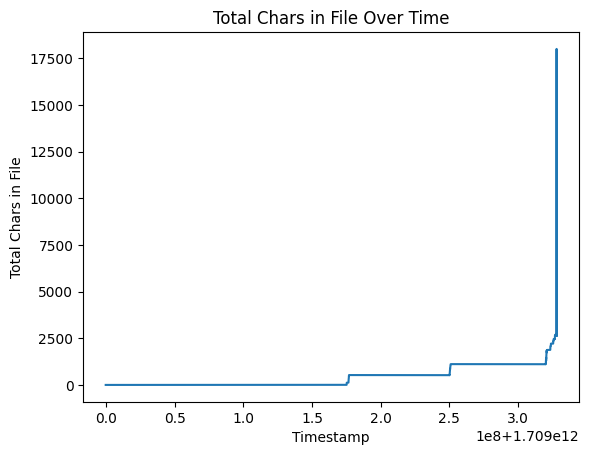

In [9]:
# Plotting total_chars_in_file over time
plt.plot(df['t'], df['_cs'].fillna(method='ffill'))
plt.title("Total Chars in File Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Total Chars in File")
plt.show()

C:\Users\K-Gen\AppData\Local\Temp\ipykernel_16192\3970496429.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dy_dx = np.gradient(df['_cs'].fillna(method='ffill'), df['t'])
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\K-Gen\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (

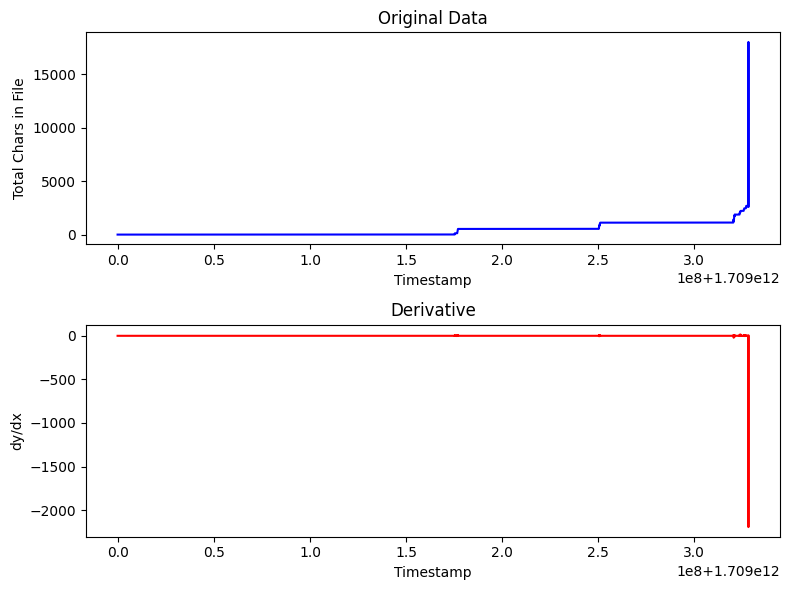

In [10]:
dy_dx = np.gradient(df['_cs'].fillna(method='ffill'), df['t'])

# Plotting the data
plt.figure(figsize=(8, 6))

# Original data
plt.subplot(2, 1, 1)
plt.plot(df['t'], df['_cs'].fillna(method='ffill'), color='blue')
plt.title("Original Data")
plt.xlabel("Timestamp")
plt.ylabel("Total Chars in File")

# Derivative data
plt.subplot(2, 1, 2)
plt.plot(df['t'], dy_dx, color='red')
plt.title("Derivative")
plt.xlabel("Timestamp")
plt.ylabel("dy/dx")

plt.tight_layout()
plt.show()